In [26]:
# Adarsh Anand
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,train_test_split)
from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, mean_absolute_error,roc_auc_score)
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier,RandomForestRegressor)
import re,random,sys,json,time,os,warnings,pickle,datetime,subprocess,requests,math
import pyforest,klib,missingno as msno
import numpy as np, pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from typing import List, Dict, Tuple, Any
#import keras as kr,tensorflow as tf,cv2 as cv

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5,
        palette='hls', font='Arial', rc={'figure.figsize': (10, 8)})
pd.options.plotting.backend = 'matplotlib'

In [27]:
# pip install pytrends
import pandas as pd
from pytrends.request import TrendReq

#### 5 keywords at a time

In [28]:
pytrends = TrendReq(hl='en-US', tz=360) # host language, timezone
pytrends


In [29]:
keywords= ['Python','C++','Java']

In [30]:
pytrends.build_payload(kw_list=keywords, cat=0, timeframe='today 5-y', geo='', gprop='')

In [31]:
data = pytrends.interest_over_time()

In [32]:
data

,Python,C++,Java,isPartial
date,,,,
2017-03-05,20,86,37,False
2017-03-12,21,86,37,False
2017-03-19,21,85,38,False
2017-03-26,24,85,38,False
2017-04-02,21,83,36,False
...,...,...,...,...
2022-01-30,27,90,21,False
2022-02-06,29,92,21,False
2022-02-13,29,91,22,False


In [33]:
data.dtypes

Python       int32
C++          int32
Java         int32
isPartial     bool
dtype: object

<AxesSubplot:xlabel='date'>

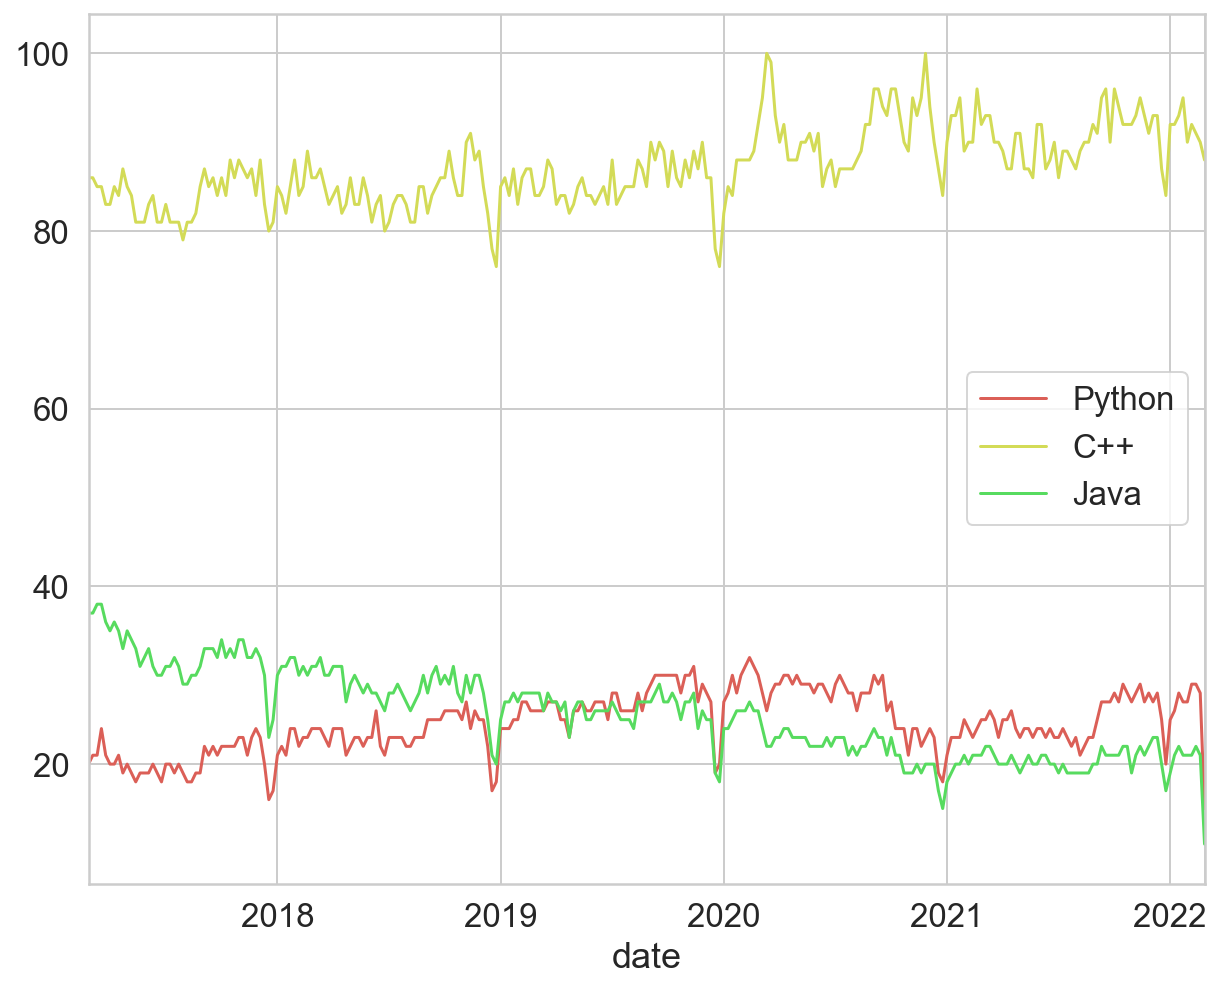

In [34]:
data.plot()

In [35]:
data2 = pytrends.interest_by_region(resolution='COUNTRY',inc_low_vol=True)
data2

,Python,C++,Java
geoName,,,
Afghanistan,13,63,24
Albania,6,58,36
Algeria,10,74,16
American Samoa,0,100,0
Andorra,13,69,18
...,...,...,...
Western Sahara,16,67,17
Yemen,15,65,20
Zambia,3,72,25


In [39]:
# top 10 countries
data2 = data2.sort_values(by='Python', ascending=False).head(10)
data2

,Python,C++,Java
geoName,,,
China,56,12,32
Israel,44,34,22
St. Helena,39,27,34
Eritrea,36,22,42
Singapore,35,44,21
South Korea,34,37,29
Iceland,33,53,14
Russia,30,48,22
Norway,29,54,17


<AxesSubplot:xlabel='geoName'>

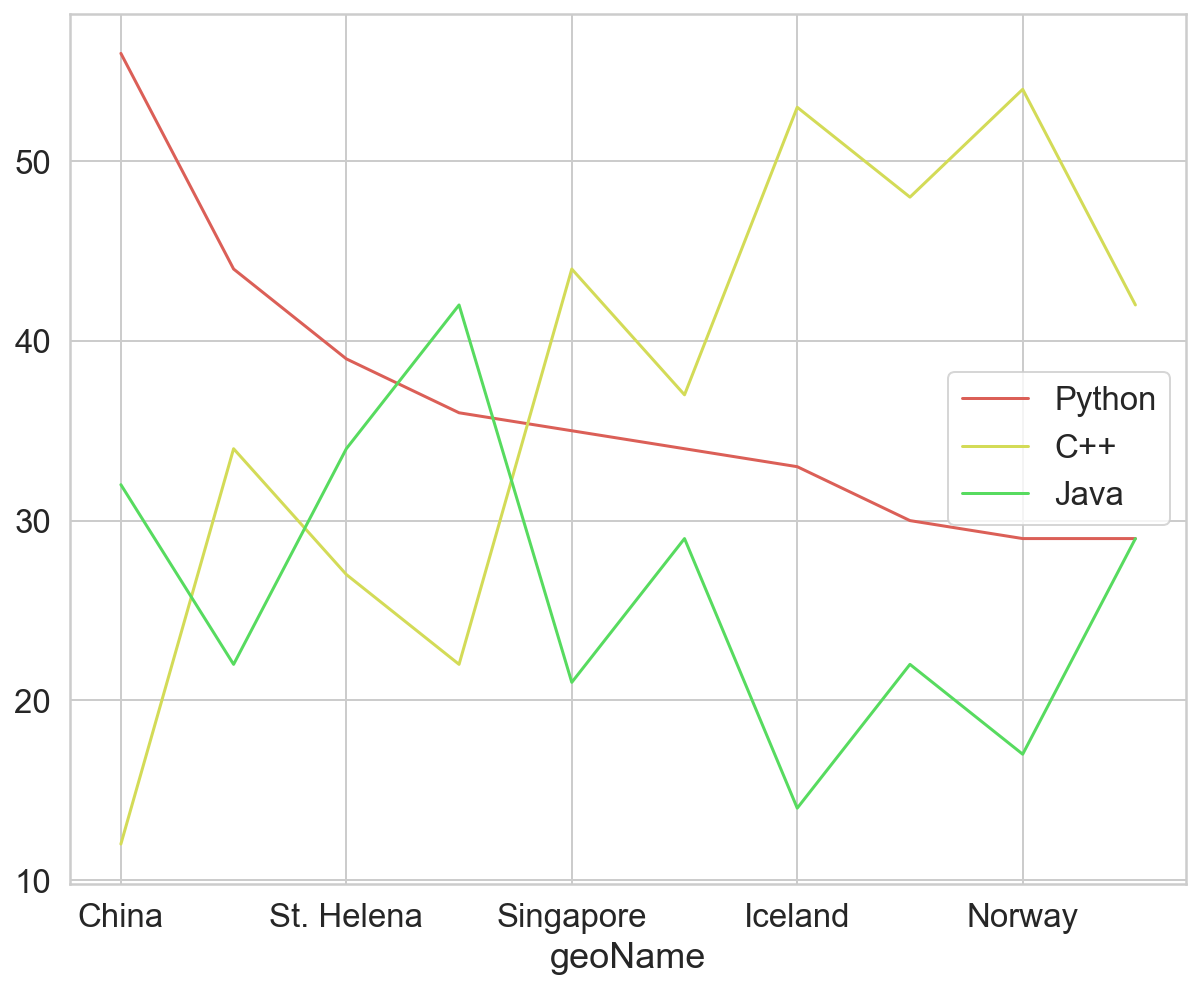

In [52]:
data2.plot()

<AxesSubplot:xlabel='geoName'>

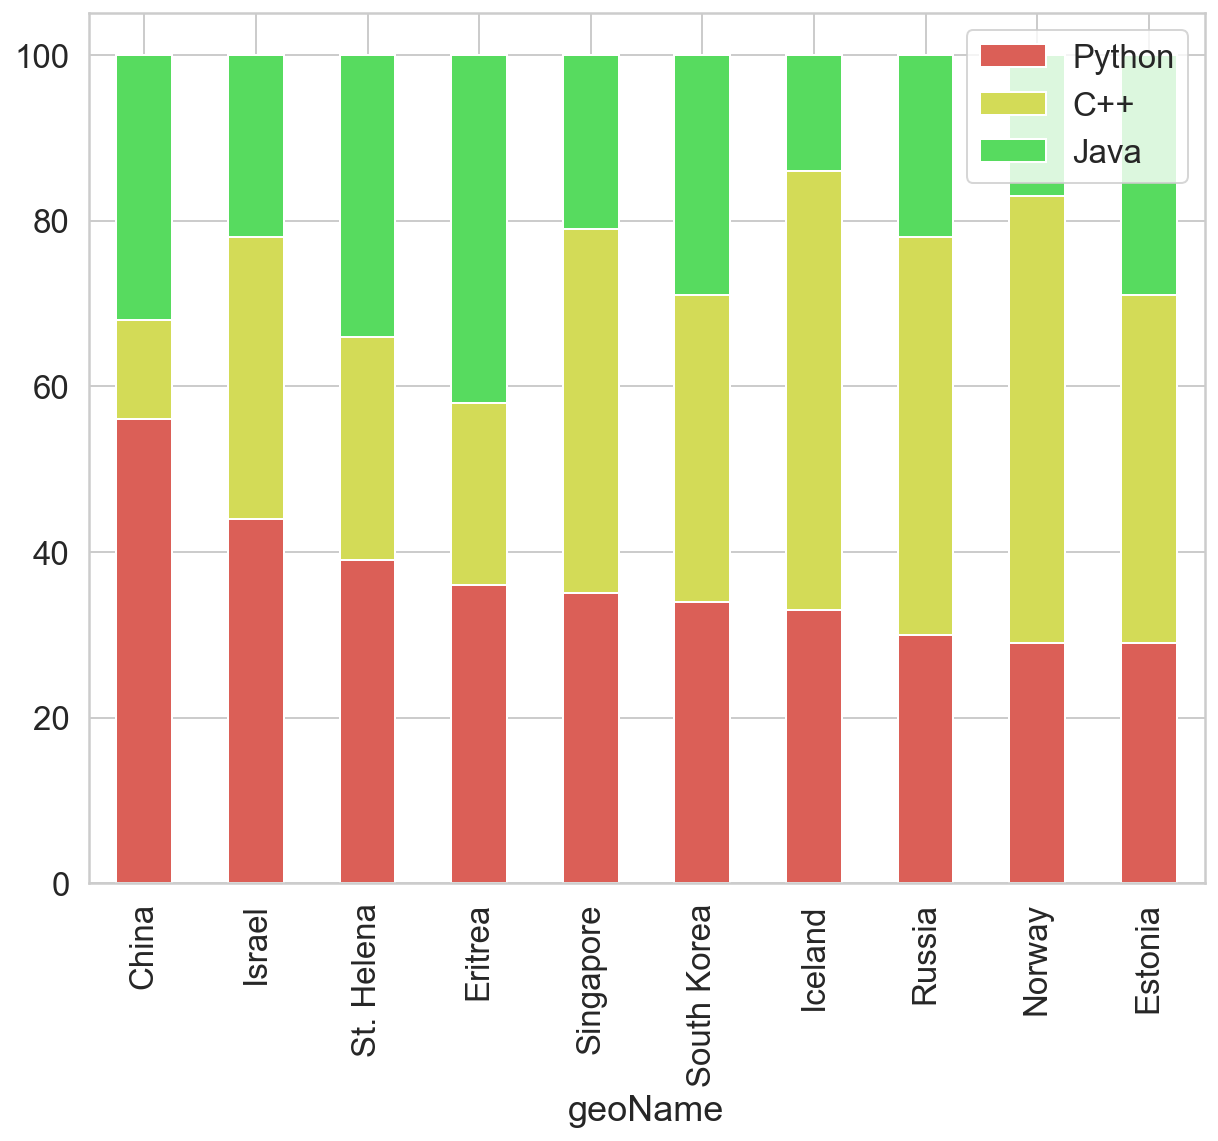

In [53]:
data2.plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='geoName'>

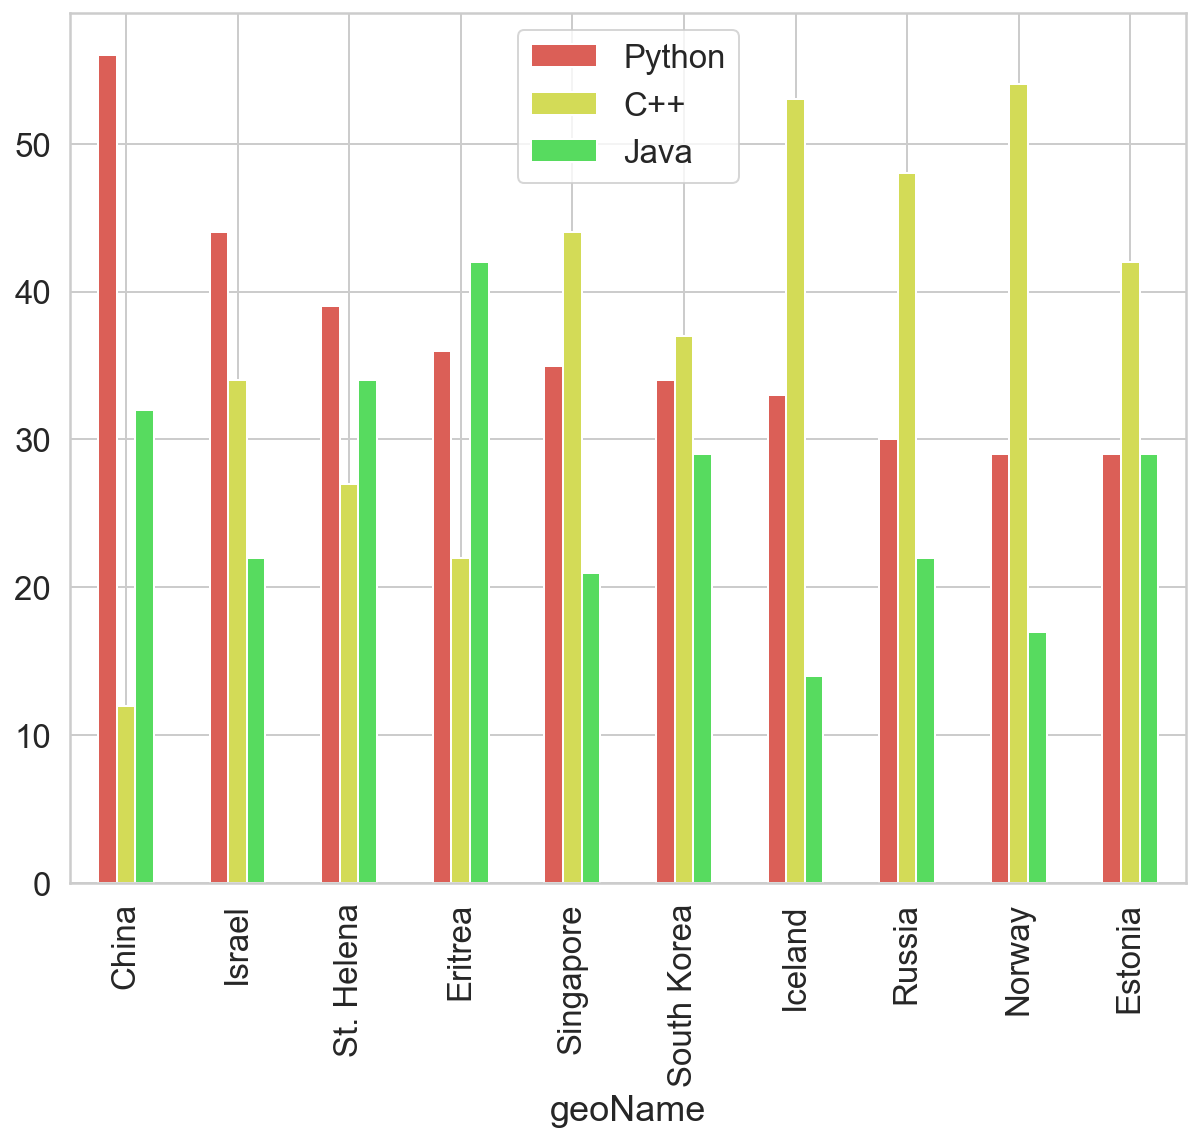

In [54]:
data2.plot(kind='bar',stacked=False)

<AxesSubplot:ylabel='geoName'>

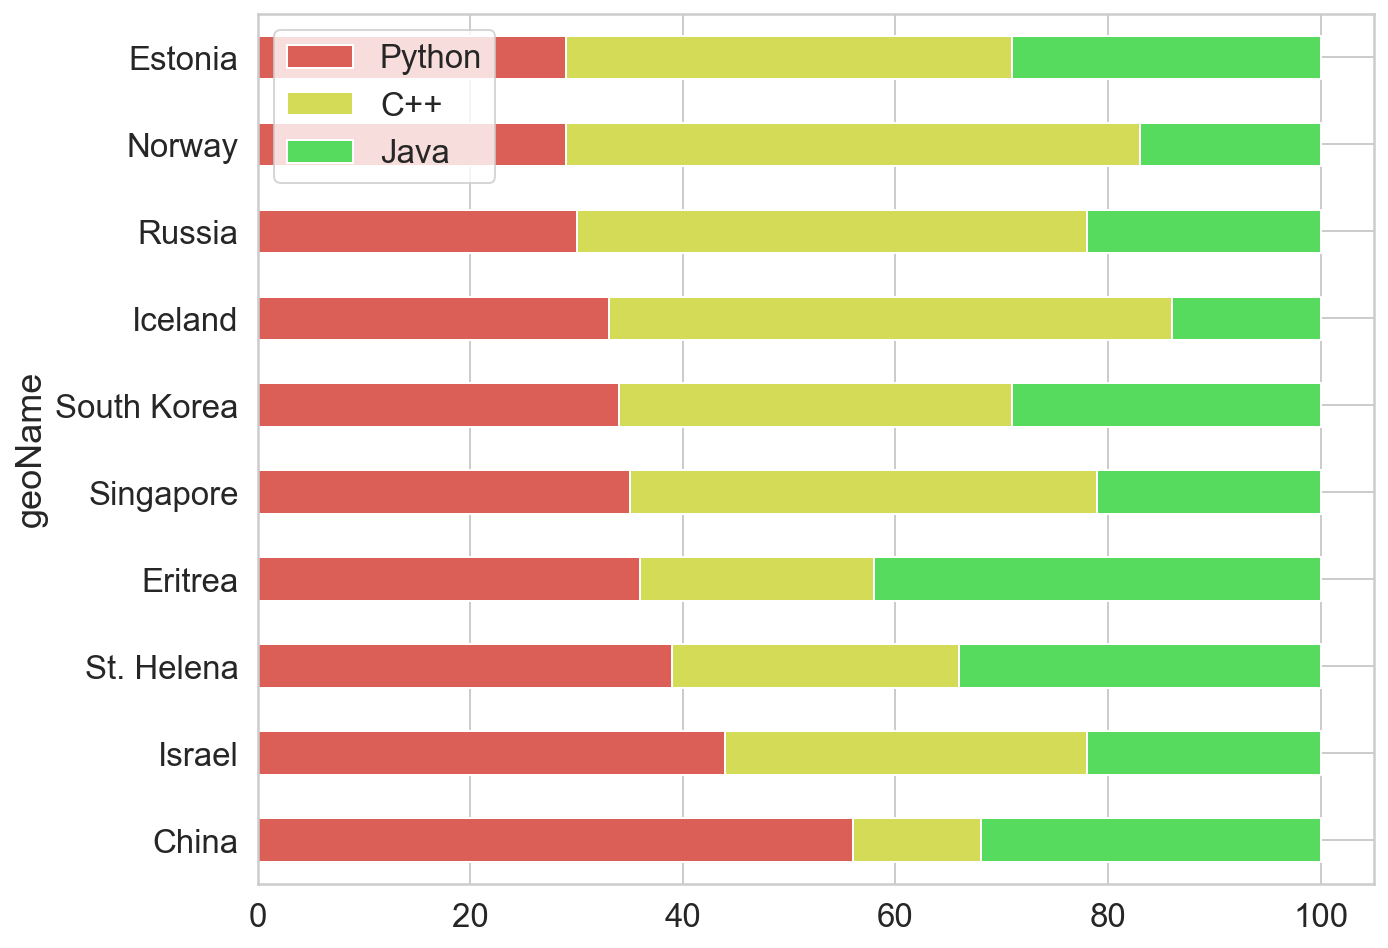

In [57]:
data2.plot(kind='barh',stacked=True)


<AxesSubplot:xlabel='geoName'>

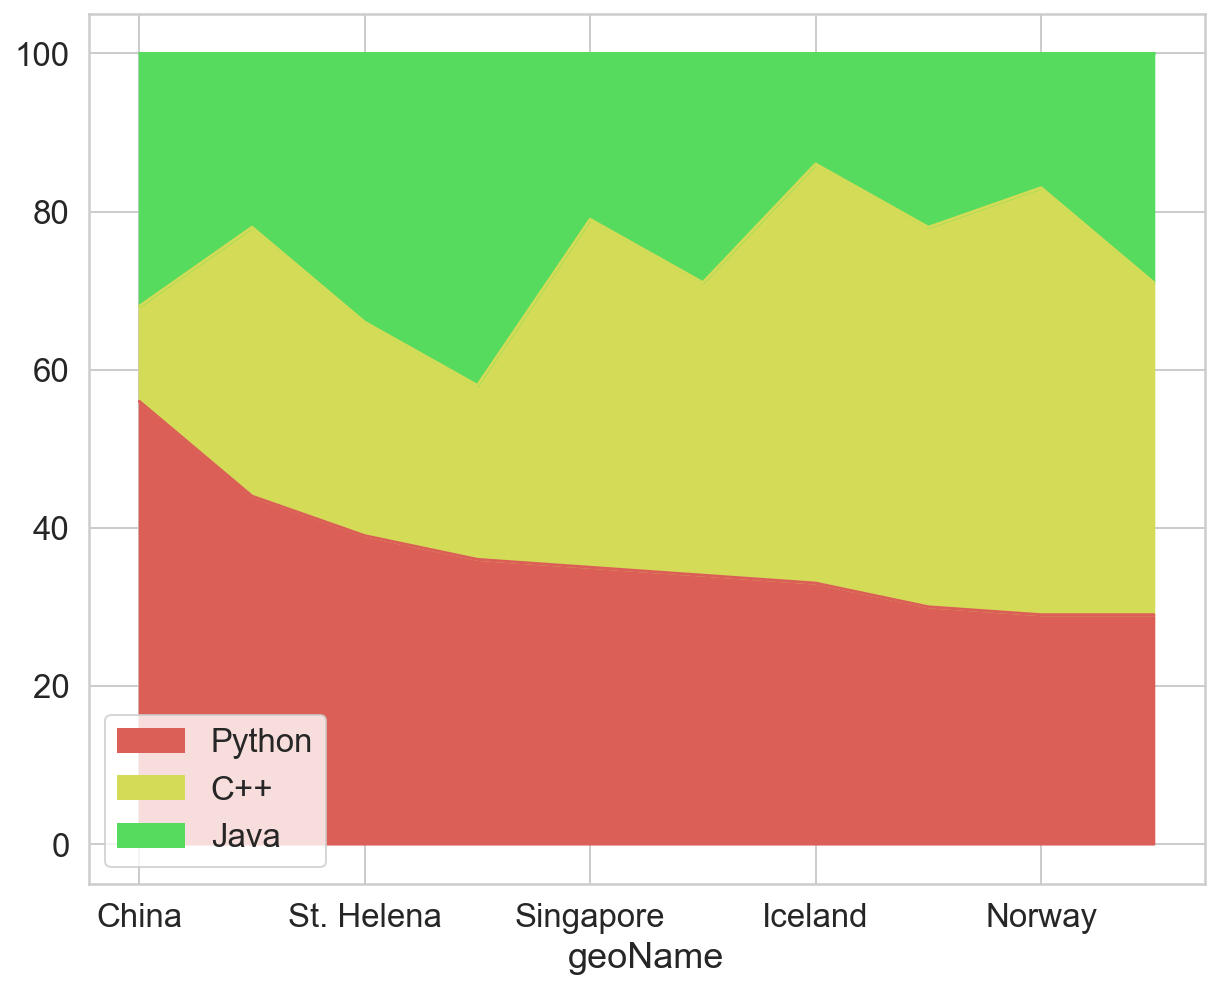

In [58]:
data2.plot(kind='area',stacked=True)

‘bar’ or ‘barh’ for bar plots

‘hist’ for histogram

‘box’ for boxplot

‘kde’ or ‘density’ for density plots

‘area’ for area plots

‘scatter’ for scatter plots

‘hexbin’ for hexagonal bin plots

‘pie’ for pie plots

<AxesSubplot:ylabel='Density'>

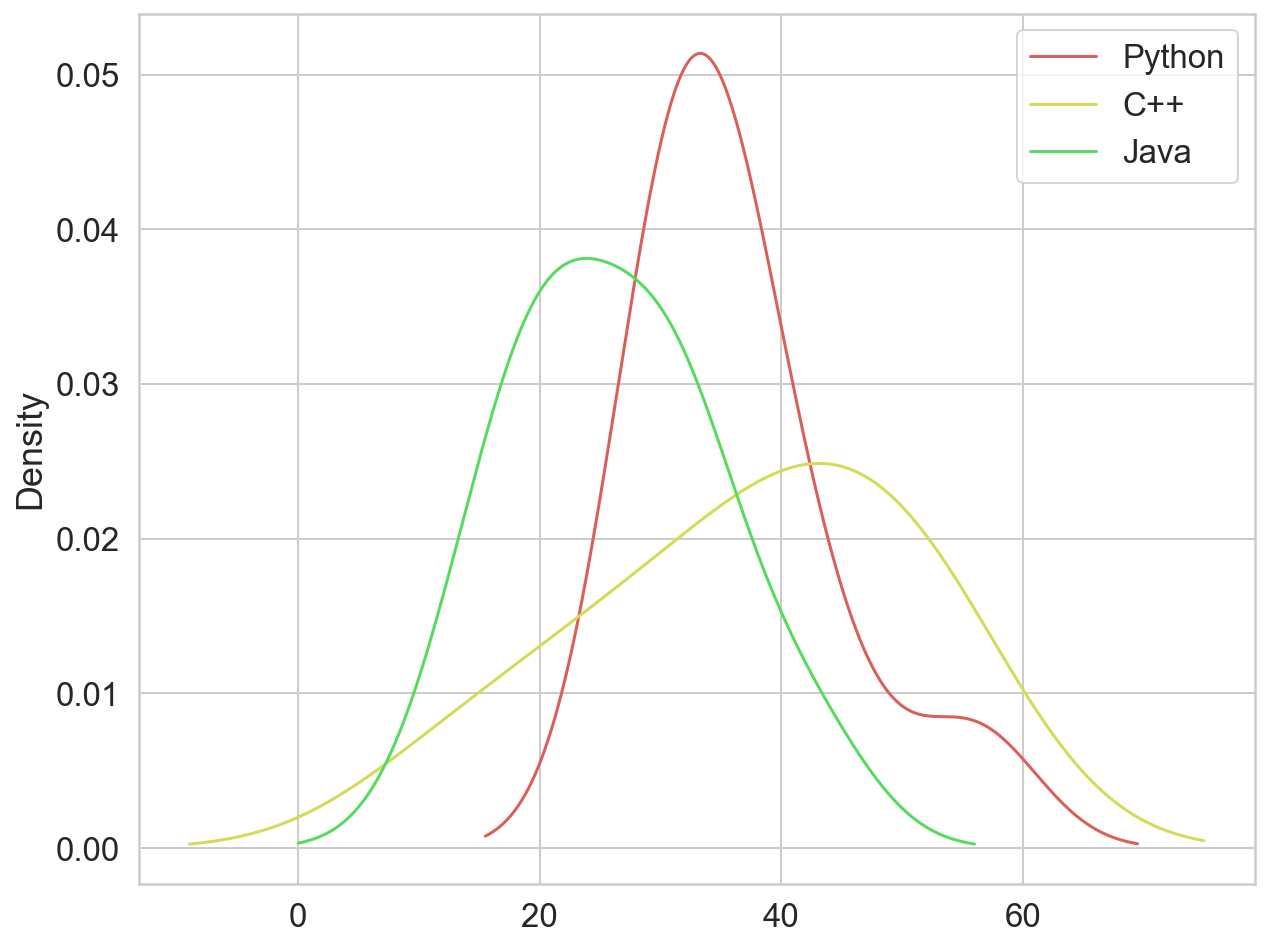

In [60]:
data2.plot(kind='kde',stacked=False)